In [1]:
# Import the evprofiler package

from evprofiler.ev import EV, DrivableEV
from evprofiler.trip import Trip, DrivableTrip
from evprofiler.aggregator import Aggregator
from evprofiler.station import ChargingStation
from evprofiler.profile import Profile, Schedule, User

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd

In [2]:
# Create a list of EVs to use in the simulation

EVs = [EV(brand='Nissan', model='Leaf', battery_type='BEV', battery_size=59,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.16, energy_per_km=0.17, soc_min=0.8, soc_max=1.0),
       EV(brand='Tesla', model='Model 3', battery_type='BEV', battery_size=95,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.13, energy_per_km=0.18, soc_min=0.8, soc_max=1.0),
       EV(brand='Peugeot', model='e-Expert', battery_type='BEV', battery_size=68,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.1, energy_per_km=0.26, soc_min=0.8, soc_max=1.0),
       EV(brand='Renault', model='Zoe', battery_type='BEV', battery_size=52,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.1, energy_per_km=0.17, soc_min=0.8, soc_max=1.0),
       EV(brand='Jaguar', model='I-Pace', battery_type='BEV', battery_size=85,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.09, energy_per_km=0.22, soc_min=0.8, soc_max=1.0),
       EV(brand='Mercedes', model='E300', battery_type='PHEV', battery_size=13.5,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.08, energy_per_km=0.18, soc_min=0.8, soc_max=1.0),
       EV(brand='BMW', model='530e', battery_type='PHEV', battery_size=70.2,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.08, energy_per_km=0.16, soc_min=0.8, soc_max=1.0),
       EV(brand='Audi Q4', model='e-tron', battery_type='PHEV', battery_size=55,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.07, energy_per_km=0.17, soc_min=0.8, soc_max=1.0),
       EV(brand='Hyundai', model='Kauai', battery_type='BEV', battery_size=74,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.06, energy_per_km=0.192, soc_min=0.8, soc_max=1.0),
       EV(brand='Volvo', model='XC40', battery_type='PHEV', battery_size=78,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.05, energy_per_km=0.176, soc_min=0.8, soc_max=1.0),
       EV(brand='Wolkswagen', model='ID.3', battery_type='PHEV', battery_size=58,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.05, energy_per_km=0.155, soc_min=0.8, soc_max=1.0),
       EV(brand='Others', model='Others', battery_type='PEV', battery_size=20,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.03, energy_per_km=0.2, soc_min=0.8, soc_max=1.0)]

# Print the sum of the probabilities in the population of EVs
sum_of_probabilities = 0
for ev in EVs:
    sum_of_probabilities += ev.probability_in_population
print(sum_of_probabilities)

1.0


In [80]:
# Create a list of Charging Stations to use in the simulation

PUBLIC_STATIONS = [ChargingStation(charging_station_type='Public Ultrafast (150 kW)',
                                   charging_station_power=150,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.0233,
                                   color='orange'),
                   ChargingStation(charging_station_type='Public Fast (50 kW)',
                                   charging_station_power=50,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.434,
                                   color='red'),
                   ChargingStation(charging_station_type='Public Semi-fast (22 kW)',
                                   charging_station_power=22,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.4394,
                                   color='blue'),
                   ChargingStation(charging_station_type='Public Slow (7.2 kW)',
                                   charging_station_power=7.2,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.1033,
                                   color='green')]

PRIVATE_STATIONS = [ChargingStation(charging_station_type='Private Fast (50 kW)',
                                    charging_station_power=50,
                                    charging_station_efficiency=0.9,
                                    charging_station_cost=0.297,
                                    charging_station_probability=0.0405,
                                    color='purple'),
                    ChargingStation(charging_station_type='Private Semi-fast (22 kW)',
                                    charging_station_power=22,
                                    charging_station_efficiency=0.9,
                                    charging_station_cost=0.297,
                                    charging_station_probability=0.9595,
                                    color='mediumpurple')]

RESIDENTIAL_CS1 = [ChargingStation(charging_station_type='Residential Slow CS1 (3.6 kW)',
                                   charging_station_power=3.6,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.6,
                                   color='grey'),
                   ChargingStation(charging_station_type='Residential Slow CS1 (7.2 kW)',
                                   charging_station_power=7.2,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.4,
                                   color='silver')]

RESIDENTIAL_CS2 = [ChargingStation(charging_station_type='Residential Slow CS2 (3.6 kW)',
                                   charging_station_power=3.6,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.3,
                                   color='yellow'),
                   ChargingStation(charging_station_type='Residential Slow CS2 (7.2 kW)',
                                   charging_station_power=7.2,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.6,
                                   color='cyan'),
                   ChargingStation(charging_station_type='Residential Semi-fast CS2 (22 kW)',
                                   charging_station_power=22,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.1,
                                   color='lightgreen')]

In [81]:
# Create the profiles to use in the simulation

# Create a list of profiles
PROFILES = [Profile(profile_name='Residential1', profile_trip_schedule=Schedule([8, 18.5]), trip_type='Short',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS1},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.3),
            Profile(profile_name='Residential2', profile_trip_schedule=Schedule([5, 18.5]), trip_type='Medium',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS1},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.2),
            Profile(profile_name='Residential3', profile_trip_schedule=Schedule([8, 18.5]), trip_type='Short',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS2},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.2),
            Profile(profile_name='Residential4', profile_trip_schedule=Schedule([8, 18.5]), trip_type='Long',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS2},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.2),
            Profile(profile_name='Work1', profile_trip_schedule=Schedule([8, 13, 18.5]), trip_type='Long',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': PRIVATE_STATIONS},
                    charge_during_day=True, charge_during_night=False, soc_min_tocharge=1.0,
                    profile_probability=0.1)]


In [82]:
# Create the simulation

aggregator = Aggregator(profiles=PROFILES, evs=EVs, n_evs=20,
                        avg_speed_short=60, avg_speed_medium=80, avg_speed_long=100, avg_speed_variation=1.0,
                        simulation_cycles=7, show_progress=True, trip_start_variation=0.1)

aggregator.run_sim()

Simulating  007 cycles...
Creating EVs...


  0%|          | 0/20 [00:00<?, ?it/s]

Creating trips...
Assigning trips to EVs...


  0%|          | 0/20 [00:00<?, ?it/s]

Splitting trips...


  0%|          | 0/20 [00:00<?, ?it/s]

Creating DataFrames...
Creating EV charging history DataFrame...


  0%|          | 0/136 [00:00<?, ?it/s]

Creating EV driving history DataFrame...


  0%|          | 0/294 [00:00<?, ?it/s]

Creating EV stopped DataFrame...


  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

Creating EV flexibility DataFrame...


  0%|          | 0/136 [00:00<?, ?it/s]

In [83]:
# Print the population
aggregator.simulation_dataframes['population']

,brand,model,battery_type,battery_size,charging_efficiency,discharging_efficiency,energy_per_km,soc_min,soc_max,probability_in_population,...,driving_start_soc,driving_end_soc,driving_distance,driving_energy_consumption,flexibility_start_time,flexibility_end_time,flexibility_type,flexibility_power,flexibility_start_soc,flexibility_end_soc
0,Tesla,Model 3,BEV,95.0,0.9,0.9,0.180,0.8,1.0,0.13,...,"[0.82, 0.7147368421052631, 0.9609473684210527,...","[0.7147368421052631, 0.6094736842105263, 0.856...","[50.0, 50.0, 49.835, 49.835, 47.97, 47.97, 46....","[0.09473684210526316, 0.09473684210526316, 0.0...","[2023-01-01 19:11:37.404412, 2023-01-02 19:11:...","[2023-01-02 07:58:00, 2023-01-03 08:01:00, 202...","[Residential Slow CS2 (7.2 kW), Residential Sl...","[7.2, 7.2, 7.2, 7.2, 7.2, 7.2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,Renault,Zoe,BEV,52.0,0.9,0.9,0.170,0.8,1.0,0.10,...,"[0.88, 0.8367190170940171, 0.9793438034188034,...","[0.8367190170940171, 0.7934380341880342, 0.934...","[11.915, 11.915, 12.47, 12.47, 11.815, 11.815,...","[0.03895288461538461, 0.03895288461538461, 0.0...","[2023-01-01 18:42:53.223125, 2023-01-02 18:42:...","[2023-01-02 05:01:00, 2023-01-03 04:58:00, 202...","[Residential Slow CS1 (3.6 kW), Residential Sl...","[3.6, 3.6, 3.6, 3.6, 3.6, 3.6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,Nissan,Leaf,BEV,59.0,0.9,0.9,0.170,0.8,1.0,0.16,...,"[0.94, 0.9325885122410545, 0.9925177024482109,...","[0.9325885122410545, 0.9251770244821091, 0.984...","[2.315, 2.315, 2.505, 2.505, 2.325, 2.325, 2.3...","[0.006670338983050848, 0.006670338983050848, 0...","[2023-01-01 18:35:20.303731, 2023-01-02 18:37:...","[2023-01-02 07:59:00, 2023-01-03 08:05:00, 202...","[Residential Slow CS1 (7.2 kW), Residential Sl...","[7.2, 7.2, 7.2, 7.2, 7.2, 7.2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,Renault,Zoe,BEV,52.0,0.9,0.9,0.170,0.8,1.0,0.10,...,"[0.92, 0.8899957264957266, 0.9859991452991453,...","[0.8899957264957266, 0.8599914529914531, 0.957...","[8.26, 8.26, 7.85, 7.85, 7.9, 7.9, 8.24, 8.24,...","[0.027003846153846156, 0.027003846153846156, 0...","[2023-01-01 18:43:21.255645, 2023-01-02 18:35:...","[2023-01-02 08:04:00, 2023-01-03 08:02:00, 202...","[Residential Slow CS1 (7.2 kW), Residential Sl...","[7.2, 7.2, 7.2, 7.2, 7.2, 7.2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,Others,Others,PEV,20.0,0.9,0.9,0.200,0.8,1.0,0.03,...,"[0.89, 0.89, 0.989, 0.989, 0.9989, 0.9989, 0.9...","[0.89, 0.89, 0.989, 0.989, 0.9989, 0.9989, 0.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2023-01-01 18:35:00, 2023-01-02 18:28:00, 202...","[2023-01-02 07:56:00, 2023-01-03 07:55:00, 202...","[Residential Semi-fast CS2 (22 kW), Residentia...","[22, 22, 22, 22, 22, 22]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
5,Others,Others,PEV,20.0,0.9,0.9,0.200,0.8,1.0,0.03,...,"[0.98, 0.9509444444444445, 0.9921888888888889,...","[0.9509444444444445, 0.921888888888889, 0.9619...","[2.615, 2.615, 2.725, 2.725, 2.685, 2.685, 2.5...","[0.02615, 0.02615, 0.027250000000000003, 0.027...","[2023-01-01 18:28:35.999657, 2023-01-02 18:28:...","[2023-01-02 08:03:00, 2023-01-03 07:59:00, 202...","[Residential Slow CS1 (3.6 kW), Residential Sl...","[3.6, 3.6, 3.6, 3.6, 3.6, 3.6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
6,Peugeot,e-Expert,BEV,68.0,0.9,0.9,0.260,0.8,1.0,0.10,...,"[0.9, 0.8804787581699347, 0.986095751633987, 0...","[0.8804787581699347, 0.8609575163398694, 0.964...","[4.595, 4.595, 4.985, 4.985, 4.635, 4.635, 4.9...","[0.017569117647058822, 0.017569117647058822, 0...","[2023-01-01 18:28:37.691826, 2023-01-02 18:37:...","[2023-01-02 07:54:00, 2023-01-03 08:04:00, 202...","[Residential Slow CS1 (3.6 kW), Residential Sl...","[3.6, 3.6, 3.6, 3.6, 3.6, 3.6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
7,Nissan,Leaf,BEV,59.0,0.9,0.9,0.17

In [84]:
print([trip.trip_length for trip in aggregator.trips])

[22.97, 0.0, 4.81, 63.98, 9.67, 5.23, 8.34, 16.47, 17.29, 4.09, 4.66, 0.54, 83.85, 36.34, 39.91, 47.43, 31.66, 96.84, 13.57, 24.01]


In [85]:
# Assigned segments
aggregator.simulation_dataframes['assigned_segments']

,trip_length,trip_start_time,trip_end_time,trip_duration,ev,ev_id,trip_speed,trip_energy_consumption,trip_required_soc,ev_battery_size,trip_estimate_arrival,profile,trip_id,covered_distance
0,50.000,2023-01-01 07:57:00,2023-01-01 08:34:47.646835,0 days 00:37:47.646835,Tesla Model 3 with 95 kWh battery,6a9f222d1e13b2e85704144f62e6e092,79.377440,9.0000,0.094737,95.0,2023-01-01 08:34:47.646835,"N:Residential4, T:Long",0b5e9e2e7d557704a02e8d3dca5acefd,50.000
1,50.000,2023-01-01 18:34:00,2023-01-01 19:11:37.404412,0 days 00:37:37.404412,Tesla Model 3 with 95 kWh battery,6a9f222d1e13b2e85704144f62e6e092,79.737596,9.0000,0.094737,95.0,2023-01-01 19:11:37.404412,"N:Residential4, T:Long",6a69ffa669cb98ab47e54b64409bd9d1,50.000
2,49.835,2023-01-02 07:58:00,2023-01-02 08:35:26.435496,0 days 00:37:26.435496,Tesla Model 3 with 95 kWh battery,6a9f222d1e13b2e85704144f62e6e092,79.862520,8.9703,0.094424,95.0,2023-01-02 08:35:26.435496,"N:Residential4, T:Long",f2d2359cbec4327ae576579b87d08738,49.835
3,49.835,2023-01-02 18:34:00,2023-01-02 19:11:04.536525,0 days 00:37:04.536525,Tesla Model 3 with 95 kWh battery,6a9f222d1e13b2e85704144f62e6e092,80.648710,8.9703,0.094424,95.0,2023-01-02 19:11:04.536525,"N:Residential4, T:Long",b6bd21e1dfe9aa562f08d9f7aba92d6c,49.835
4,47.970,2023-01-03 08:01:00,2023-01-03 08:36:39.737675,0 days 00:35:39.737675,Tesla Model 3 with 95 kWh battery,6a9f222d1e13b2e85704144f62e6e092,80.707089,8.6346,0.090891,95.0,2023-01-03 08:36:39.737675,"N:Residential4, T:Long",fd63b8f73ce99d21d727f4ff4756fb46,47.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,24.835,2023-01-05 18:32:00,2023-01-05 18:56:59.710121,0 days 00:24:59.710121,Jaguar I-Pace with 85 kWh battery,465b29c354b1b85a3e1459d86274d396,59.615521,5.4637,0.064279,85.0,2023-01-05 18:56:59.710121,"N:Residential4, T:Long",5b7ee8a22f9040af34050c2062d87697,24.835
290,24.240,2023-01-06 07:58:00,2023-01-06 08:22:04.117572,0 days 00:24:04.117572,Jaguar I-Pace with 85 kWh battery,465b29c354b1b85a3e1459d86274d396,60.427213,5.3328,0.062739,85.0,2023-01-06 08:22:04.117572,"N:Residential4, T:Long",af00bfb1f732b80eb3966808fd32e45f,24.240
291,24.240,2023-01-06 18:32:00,2023-01-06 18:55:52.813937,0 days 00:23:52.813937,Jaguar I-Pace with 85 kWh battery,465b29c354b1b85a3e1459d86274d396,60.903930,5.3328,0.062739,85.0,2023-01-06 18:55:52.813937,"N:Residential4, T:Long",ad1bb0734660a39409490e8cf46f4a13,24.240
292,22.600,2023-01-07 08:00:00,2023-01-07 08:22:20.914019,0 days 00:22:20.914019,Jaguar I-Pace with 85 kWh battery,465b29c354b1b85a3e1459d86274d396,60.675031,4.9720,0.058494,85.0,2023-01-07 08:22:20.914019,"N:Residential4, T:Long",0f88d52603e5afd42b3ca84b1e2119ae,22.600


In [86]:
# Print the charging stations

aggregator.simulation_dataframes['cs_history']

,start_time,end_time,start_soc,end_soc,ev_id,station_type,station_power
0,2023-01-01 19:11:37.404412,2023-01-02 00:55:08.515523,0.609474,0.960947,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
1,2023-01-02 19:11:04.536525,2023-01-02 22:50:00.092081,0.751116,0.975112,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
2,2023-01-03 19:10:09.023681,2023-01-03 22:29:42.579237,0.773133,0.977313,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
3,2023-01-04 18:59:54.838297,2023-01-04 22:11:46.638297,0.781882,0.978188,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
4,2023-01-05 19:05:02.630420,2023-01-05 22:29:24.921531,0.767662,0.976766,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
...,...,...,...,...,...,...,...
131,2023-01-02 18:52:41.157183,2023-01-02 21:03:11.897924,0.834173,0.983417,465b29c354b1b85a3e1459d86274d396,Residential Slow CS2 (7.2 kW),7.2
132,2023-01-03 18:54:04.620273,2023-01-03 20:57:33.496816,0.843106,0.984311,465b29c354b1b85a3e1459d86274d396,Residential Slow CS2 (7.2 kW),7.2
133,2023-01-04 18:57:31.757207,2023-01-04 20:59:17.336219,0.845294,0.984529,465b29c354b1b85a3e1459d86274d396,Residential Slow CS2 (7.2 kW),7.2
134,2023-01-05 18:56:59.710121,2023-01-05 21:01:35.576664,0.841688,0.984169,465b29c354b1b85a3e1459d86274d396,Residential Slow CS2 (7.2 kW),7.2


In [87]:
# Print the EV charging history

aggregator.simulation_dataframes['ev_charging_history'].transpose()

,6a9f222d1e13b2e85704144f62e6e092,e4d57a0e73845144404a951426ec6ade,d8ebf7b61e27d75a9a57250e241de169,8c9960a751e7cfccf2ac7d93a73d044c,9a1cfbc16352c0e808bf8982608169e9,d8d08c5d393ac58ba7ea7e658a753516,cfecbbd5324c42ab45b56c872a0f435d,b7f7afac5743694cd96fe26d7b029bf4,4cb5640ca0e91369c16a80a7926b6714,84a17f911f8d1553a021b28b63fa9733,a2ce579562d5eabbe710e6b685e50b6c,c4ef8e53c2951d7af62d5a98d80711f5,e3355722a5106453836da47357c8eb2c,99b6a5926a8794851cffd4f9e4141d65,0cd09600f11a6468b9cefc698b2fc0eb,acdcd18a95291ec3a1024202b2b63ae8,a7ef1619a453f7b4f945d74783b5ffb4,b300100e536601c1fe073ea5f2c825cb,4c818df2ec8c250a082f074ada06af9d,465b29c354b1b85a3e1459d86274d396
2023-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-07 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-07 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-07 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-07 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Print the EV driving history

aggregator.simulation_dataframes['ev_driving']

,start_time,end_time,distance,ev_id
0,2023-01-01 07:57:00,2023-01-01 08:34:47.646835,50.000,6a9f222d1e13b2e85704144f62e6e092
1,2023-01-01 18:34:00,2023-01-01 19:11:37.404412,50.000,6a9f222d1e13b2e85704144f62e6e092
2,2023-01-02 07:58:00,2023-01-02 08:35:26.435496,49.835,6a9f222d1e13b2e85704144f62e6e092
3,2023-01-02 18:34:00,2023-01-02 19:11:04.536525,49.835,6a9f222d1e13b2e85704144f62e6e092
4,2023-01-03 08:01:00,2023-01-03 08:36:39.737675,47.970,6a9f222d1e13b2e85704144f62e6e092
...,...,...,...,...
289,2023-01-05 18:32:00,2023-01-05 18:56:59.710121,24.835,465b29c354b1b85a3e1459d86274d396
290,2023-01-06 07:58:00,2023-01-06 08:22:04.117572,24.240,465b29c354b1b85a3e1459d86274d396
291,2023-01-06 18:32:00,2023-01-06 18:55:52.813937,24.240,465b29c354b1b85a3e1459d86274d396
292,2023-01-07 08:00:00,2023-01-07 08:22:20.914019,22.600,465b29c354b1b85a3e1459d86274d396


In [89]:
# Print the EV driving timeseries

aggregator.simulation_dataframes['ev_driving_history'].transpose()

,6a9f222d1e13b2e85704144f62e6e092,e4d57a0e73845144404a951426ec6ade,d8ebf7b61e27d75a9a57250e241de169,8c9960a751e7cfccf2ac7d93a73d044c,9a1cfbc16352c0e808bf8982608169e9,d8d08c5d393ac58ba7ea7e658a753516,cfecbbd5324c42ab45b56c872a0f435d,b7f7afac5743694cd96fe26d7b029bf4,4cb5640ca0e91369c16a80a7926b6714,84a17f911f8d1553a021b28b63fa9733,a2ce579562d5eabbe710e6b685e50b6c,c4ef8e53c2951d7af62d5a98d80711f5,e3355722a5106453836da47357c8eb2c,99b6a5926a8794851cffd4f9e4141d65,0cd09600f11a6468b9cefc698b2fc0eb,acdcd18a95291ec3a1024202b2b63ae8,a7ef1619a453f7b4f945d74783b5ffb4,b300100e536601c1fe073ea5f2c825cb,4c818df2ec8c250a082f074ada06af9d,465b29c354b1b85a3e1459d86274d396
2023-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-07 19:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-07 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-07 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-07 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


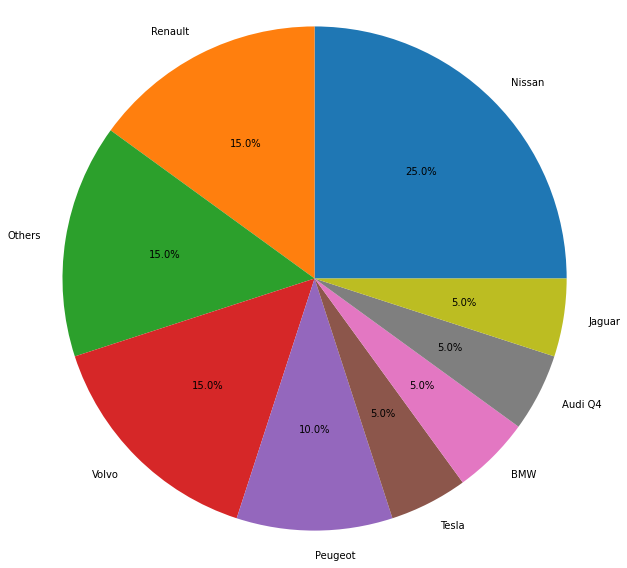

In [90]:
# Plot the population brand in a pie chart

# Values of each group
plt.figure(figsize=(10, 10))

brand_values = aggregator.simulation_dataframes['population']['brand'].value_counts()
plt.pie(brand_values, labels=brand_values.index, autopct='%1.1f%%')

# View the plot
plt.axis('equal')
plt.show()

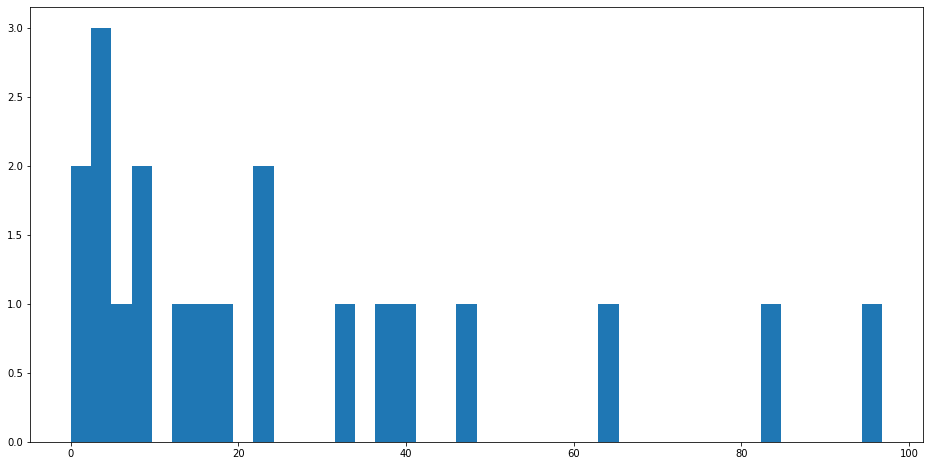

In [91]:
# Plot the trip distances in a histogram

plt.figure(figsize=(16, 8))

plt.hist(aggregator.simulation_dataframes['assigned_trips']['trip_length'], bins=40)
plt.show()

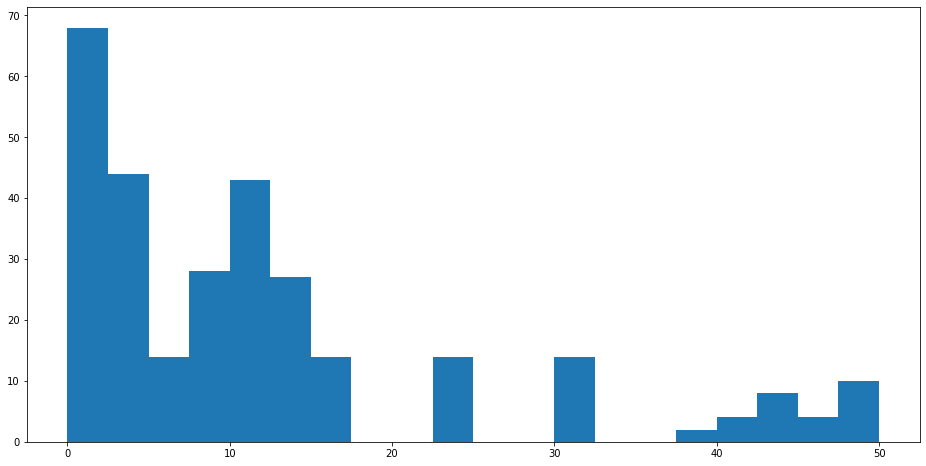

In [92]:
# Plot the segment distances in a histogram

plt.figure(figsize=(16, 8))

plt.hist(aggregator.simulation_dataframes['assigned_segments']['trip_length'], bins=20)
plt.show()

In [93]:
# Average trip distance

aggregator.simulation_dataframes['assigned_trips']['trip_length'].mean()

26.583000000000006

In [94]:
# EV charging history

aggregator.simulation_dataframes['cs_history']

,start_time,end_time,start_soc,end_soc,ev_id,station_type,station_power
0,2023-01-01 19:11:37.404412,2023-01-02 00:55:08.515523,0.609474,0.960947,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
1,2023-01-02 19:11:04.536525,2023-01-02 22:50:00.092081,0.751116,0.975112,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
2,2023-01-03 19:10:09.023681,2023-01-03 22:29:42.579237,0.773133,0.977313,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
3,2023-01-04 18:59:54.838297,2023-01-04 22:11:46.638297,0.781882,0.978188,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
4,2023-01-05 19:05:02.630420,2023-01-05 22:29:24.921531,0.767662,0.976766,6a9f222d1e13b2e85704144f62e6e092,Residential Slow CS2 (7.2 kW),7.2
...,...,...,...,...,...,...,...
131,2023-01-02 18:52:41.157183,2023-01-02 21:03:11.897924,0.834173,0.983417,465b29c354b1b85a3e1459d86274d396,Residential Slow CS2 (7.2 kW),7.2
132,2023-01-03 18:54:04.620273,2023-01-03 20:57:33.496816,0.843106,0.984311,465b29c354b1b85a3e1459d86274d396,Residential Slow CS2 (7.2 kW),7.2
133,2023-01-04 18:57:31.757207,2023-01-04 20:59:17.336219,0.845294,0.984529,465b29c354b1b85a3e1459d86274d396,Residential Slow CS2 (7.2 kW),7.2
134,2023-01-05 18:56:59.710121,2023-01-05 21:01:35.576664,0.841688,0.984169,465b29c354b1b85a3e1459d86274d396,Residential Slow CS2 (7.2 kW),7.2


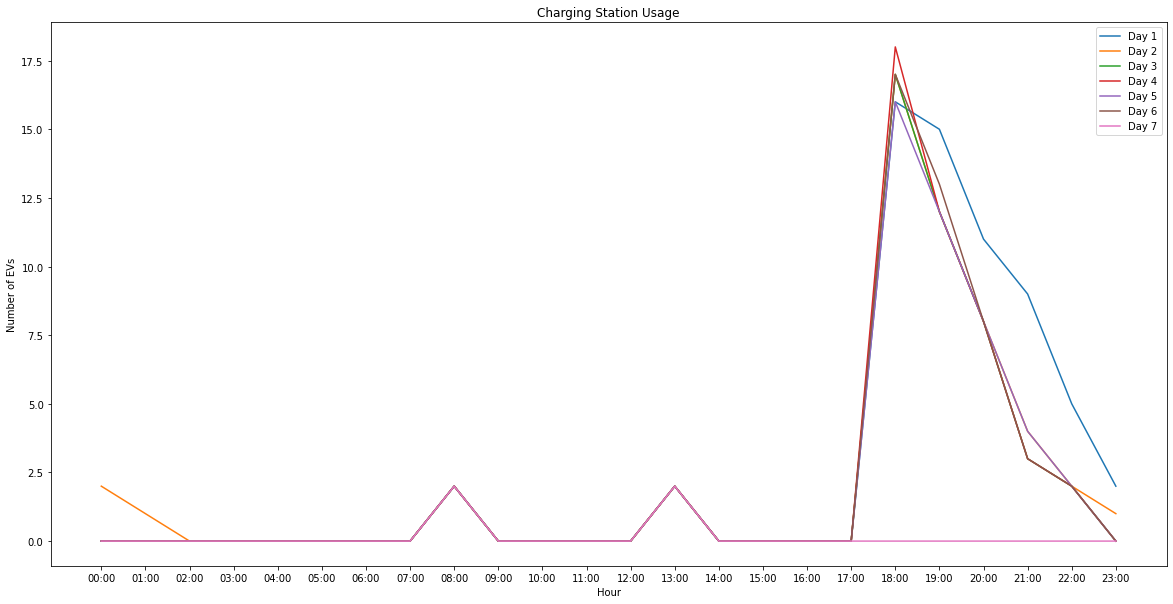

In [95]:
# Charging Station usage
# Pick a Day. If None, every day is plotted

DAY = None

# Create a figure
fig = plt.figure(figsize=(20, 10))

# Plot the data
if DAY is not None:
    plt.plot(np.sum(aggregator.simulation_dataframes['ev_charging_history'].transpose().loc[DAY].transpose() > 0, axis=0).ravel())
else:
    for i in range(1, aggregator.simulation_cycles + 1):
        plt.plot(np.sum(aggregator.simulation_dataframes['ev_charging_history'].transpose().loc['2023-01-{:02d}'.format(i)].transpose() > 0, axis=0).ravel())

# Set the title
plt.title('Charging Station Usage')

# Set the xticks to only hours in the format hh:mm
plt.xticks(np.arange(0, 24), ['{:02d}:00'.format(i) for i in range(24)])

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Number of EVs')

# Set the legend
if DAY is not None:
    plt.legend(['Day {}'.format(DAY)])
else:
    plt.legend(['Day {}'.format(i) for i in range(1, len(aggregator.simulation_dataframes) + 1)])

plt.show()

In [96]:
aggregator.simulation_dataframes['ev_charging_type']

,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-01-07 14:00:00,2023-01-07 15:00:00,2023-01-07 16:00:00,2023-01-07 17:00:00,2023-01-07 18:00:00,2023-01-07 19:00:00,2023-01-07 20:00:00,2023-01-07 21:00:00,2023-01-07 22:00:00,2023-01-07 23:00:00
6a9f222d1e13b2e85704144f62e6e092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e4d57a0e73845144404a951426ec6ade,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d8ebf7b61e27d75a9a57250e241de169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8c9960a751e7cfccf2ac7d93a73d044c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9a1cfbc16352c0e808bf8982608169e9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d8d08c5d393ac58ba7ea7e658a753516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cfecbbd5324c42ab45b56c872a0f435d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b7f7afac5743694cd96fe26d7b029bf4,0,0,0,0,0,0,0,0,Private Semi-fast (22 kW),0,...,0,0,0,0,0,0,0,0,0,0
4cb5640ca0e91369c16a80a7926b6714,0,0,0,0,0,0,0,0,Private Semi-fast (22 kW),0,...,0,0,0,0,0,0,0,0,0,0
84a17f911f8d1553a021b28b63fa9733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Build a dictionary with the keys of the charging station as names and colors as values

cs_all_stations = PUBLIC_STATIONS + PRIVATE_STATIONS + RESIDENTIAL_CS1 + RESIDENTIAL_CS2
cs_colors = {cs.charging_station_type: cs.color for i, cs in enumerate(cs_all_stations)}
cs_colors

{'Public Ultrafast (150 kW)': 'orange',
 'Public Fast (50 kW)': 'red',
 'Public Semi-fast (22 kW)': 'blue',
 'Public Slow (7.2 kW)': 'green',
 'Private Fast (50 kW)': 'purple',
 'Private Semi-fast (22 kW)': 'mediumpurple',
 'Residential Slow CS1 (3.6 kW)': 'grey',
 'Residential Slow CS1 (7.2 kW)': 'silver',
 'Residential Slow CS2 (3.6 kW)': 'yellow',
 'Residential Slow CS2 (7.2 kW)': 'cyan',
 'Residential Semi-fast CS2 (22 kW)': 'lightgreen'}

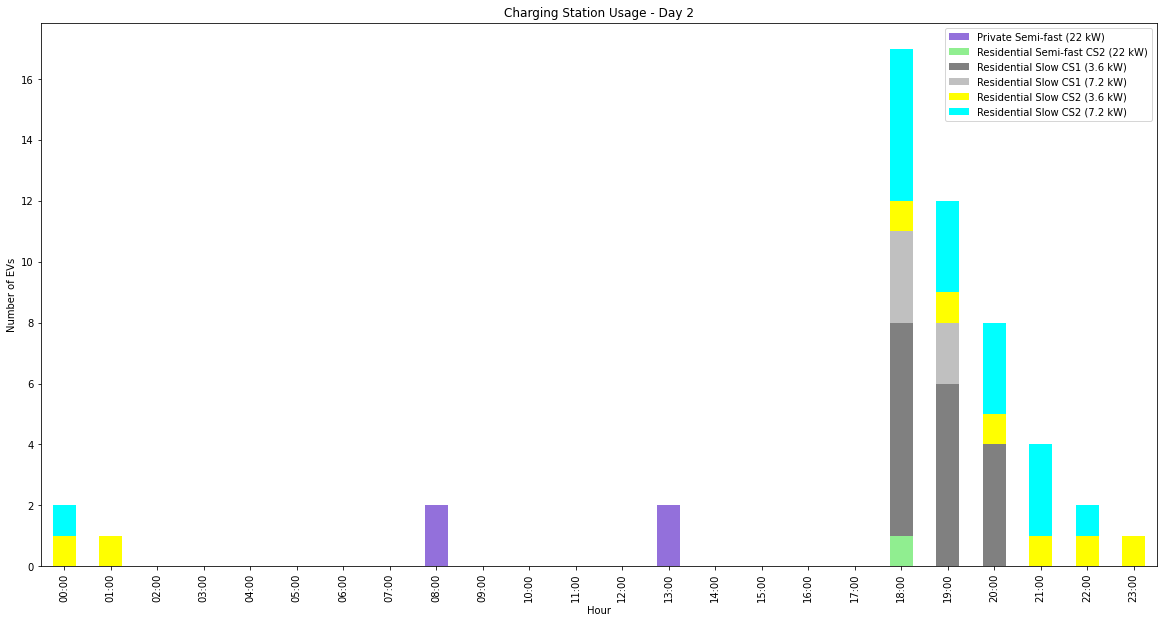

In [98]:
 # Plot a stacked bar chart of the ev_charging_history_type_hourly DataFrame

DAY = 2

# Get the value counts of each charging type at each hour
ev_charging_history_type_hourly_value_counts = aggregator.simulation_dataframes['ev_charging_type'].transpose().loc['2023-01-{:02d}'.format(DAY)].transpose().apply(pd.value_counts, axis=0)
ev_charging_history_type_hourly_value_counts.drop(0, inplace=True)
ev_charging_history_type_hourly_value_counts = ev_charging_history_type_hourly_value_counts.fillna(0)

# Set the colors to use according to the charging stations in the data
color_it = cycle(cs_colors.values())
color_map = [next(color_it) for i in range(len(ev_charging_history_type_hourly_value_counts.transpose().columns))]

# Plot the data using a stacked bar chart of the transposed DataFrame. Colors must match the ones in the cs_colors dictionary
ev_charging_history_type_hourly_value_counts.transpose().plot(kind='bar', stacked=True, figsize=(20, 10),
                                                              color=cs_colors)

# Set the color of the bars to match the colors in the cs_colors dictionary
# plt.gca().set_prop_cycle('color', [cs_colors[cs] for cs in ev_charging_history_type_hourly_value_counts.transpose().columns])

# Set the xticks to only hours in the format hh:mm
plt.xticks(np.arange(0, 24), ['{:02d}:00'.format(i) for i in range(24)])

# Set the title
plt.title('Charging Station Usage - Day {}'.format(DAY))

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Number of EVs')

plt.show()

In [99]:
ev_charging_history_type_hourly_value_counts

,2023-01-02 00:00:00,2023-01-02 01:00:00,2023-01-02 02:00:00,2023-01-02 03:00:00,2023-01-02 04:00:00,2023-01-02 05:00:00,2023-01-02 06:00:00,2023-01-02 07:00:00,2023-01-02 08:00:00,2023-01-02 09:00:00,...,2023-01-02 14:00:00,2023-01-02 15:00:00,2023-01-02 16:00:00,2023-01-02 17:00:00,2023-01-02 18:00:00,2023-01-02 19:00:00,2023-01-02 20:00:00,2023-01-02 21:00:00,2023-01-02 22:00:00,2023-01-02 23:00:00
Private Semi-fast (22 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Residential Semi-fast CS2 (22 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Residential Slow CS1 (3.6 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,6.0,4.0,0.0,0.0,0.0
Residential Slow CS1 (7.2 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0
Residential Slow CS2 (3.6 kW),1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Residential Slow CS2 (7.2 kW),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,3.0,3.0,3.0,1.0,0.0


In [100]:
# EV Stopped History

aggregator.simulation_dataframes['ev_stopped']

,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-01-07 14:00:00,2023-01-07 15:00:00,2023-01-07 16:00:00,2023-01-07 17:00:00,2023-01-07 18:00:00,2023-01-07 19:00:00,2023-01-07 20:00:00,2023-01-07 21:00:00,2023-01-07 22:00:00,2023-01-07 23:00:00
6a9f222d1e13b2e85704144f62e6e092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e4d57a0e73845144404a951426ec6ade,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d8ebf7b61e27d75a9a57250e241de169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8c9960a751e7cfccf2ac7d93a73d044c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9a1cfbc16352c0e808bf8982608169e9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d8d08c5d393ac58ba7ea7e658a753516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cfecbbd5324c42ab45b56c872a0f435d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b7f7afac5743694cd96fe26d7b029bf4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4cb5640ca0e91369c16a80a7926b6714,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
84a17f911f8d1553a021b28b63fa9733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Check when the EVs are stopped

stopped_df = aggregator.simulation_dataframes['ev_stopped'].apply(pd.value_counts, axis=0)
stopped_df.fillna(0, inplace=True)
stopped_df = stopped_df.transpose()
stopped_df.columns = ['Driving', 'Stopped']

stopped_df

,Driving,Stopped
2023-01-01 00:00:00,20.0,0.0
2023-01-01 01:00:00,20.0,0.0
2023-01-01 02:00:00,20.0,0.0
2023-01-01 03:00:00,20.0,0.0
2023-01-01 04:00:00,20.0,0.0
...,...,...
2023-01-07 19:00:00,20.0,0.0
2023-01-07 20:00:00,20.0,0.0
2023-01-07 21:00:00,20.0,0.0
2023-01-07 22:00:00,20.0,0.0


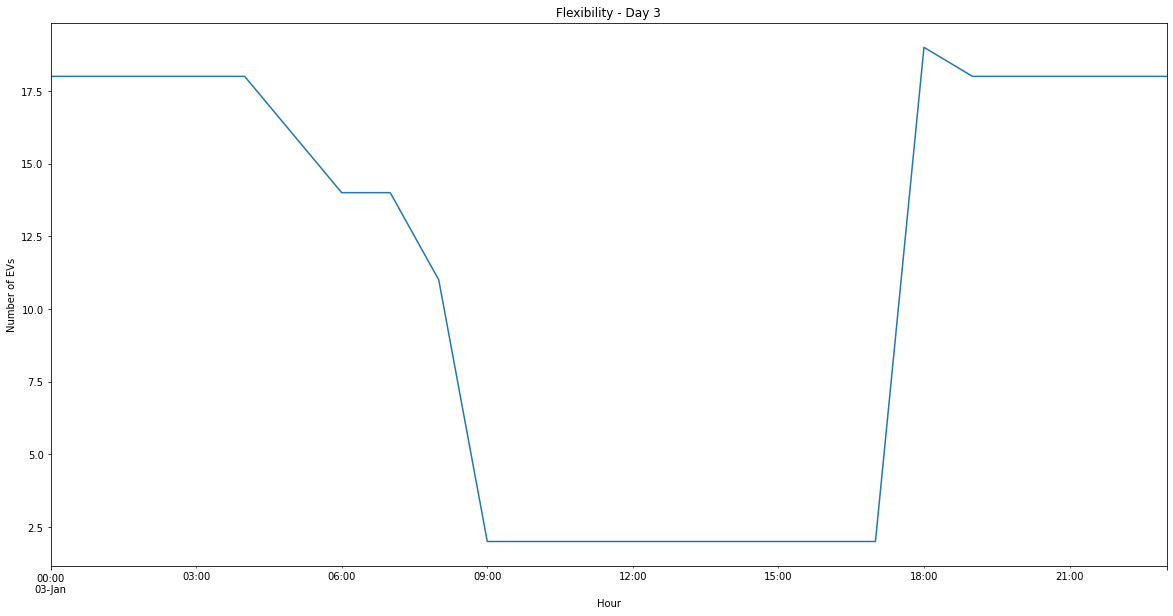

In [102]:
# Plot a stacked bar chart of the ev_stopped DataFrame

DAY = 3

plt.figure(figsize=(20, 10))

# Get the value counts of each charging type at each hour
np.sum(aggregator.simulation_dataframes['ev_flexibility'].transpose().loc['2023-01-{:02d}'.format(DAY)], axis=1).plot()

# Set the title
plt.title('Flexibility - Day {}'.format(DAY))

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Number of EVs')

# Set the y-axis to an integer
#plt.yticks(np.arange(0, aggregator.number_of_evs))

plt.show()

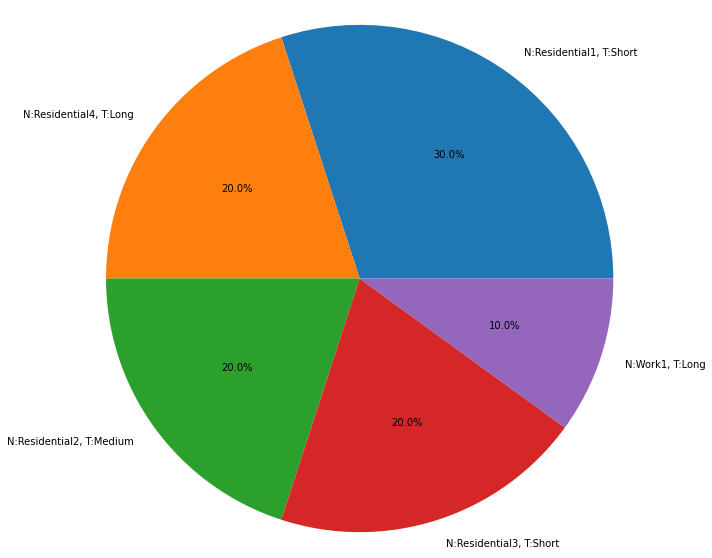

In [103]:
# Plot a pie chart of the user profiles

plt.figure(figsize=(10, 10))

# Values of each group
profile_values = aggregator.simulation_dataframes['population']['user_profile'].value_counts()
plt.pie(profile_values, labels=profile_values.index, autopct='%1.1f%%')

# View the plot
plt.axis('equal')

plt.show()

In [104]:
# Flexibility power

aggregator.simulation_dataframes['ev_flexibility_power']

,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-01-07 14:00:00,2023-01-07 15:00:00,2023-01-07 16:00:00,2023-01-07 17:00:00,2023-01-07 18:00:00,2023-01-07 19:00:00,2023-01-07 20:00:00,2023-01-07 21:00:00,2023-01-07 22:00:00,2023-01-07 23:00:00
6a9f222d1e13b2e85704144f62e6e092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e4d57a0e73845144404a951426ec6ade,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d8ebf7b61e27d75a9a57250e241de169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8c9960a751e7cfccf2ac7d93a73d044c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9a1cfbc16352c0e808bf8982608169e9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d8d08c5d393ac58ba7ea7e658a753516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cfecbbd5324c42ab45b56c872a0f435d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b7f7afac5743694cd96fe26d7b029bf4,0,0,0,0,0,0,0,0,22,22,...,22,22,22,22,22,0,0,0,0,0
4cb5640ca0e91369c16a80a7926b6714,0,0,0,0,0,0,0,0,22,22,...,22,22,22,22,22,0,0,0,0,0
84a17f911f8d1553a021b28b63fa9733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Save all the simulation dataframes to a individual CSV files

import os

# Create the directory
if not os.path.exists('simulation_dataframes'):
    os.makedirs('simulation_dataframes')

for current_df in aggregator.simulation_dataframes.keys():
    aggregator.simulation_dataframes[current_df].to_csv('simulation_dataframes/{}_{}.csv'.format(current_df, aggregator.simulation_cycles))